# Removing Warm ACIS Data


In [1]:
#source /export/ciao/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
ASCDS_WORK_PATH=./
mkdir -p ./param

In [2]:
/bin/rm -rf 13480
download_chandra_obsid 13480 evt2,mtl
mv 13480/*/*fits.gz .


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt2     fits        6 Mb  ####################          < 1 s  26835.6 kb/s
  mtl      fits        2 Mb  ####################          < 1 s  23424.1 kb/s

      Total download size for ObsId 13480 = 8 Mb
      Total download time for ObsId 13480 = < 1 s



In [3]:
/bin/ls *fits.gz
dmkeypar *evt2.fits.gz ASCDSVER echo+

acisf13480N003_evt2.fits.gz  acisf13480_000N003_mtl1.fits.gz
10.9.2


In [4]:
## Now with matplotlib

cat << EOM > plot_fptemp_plt.py
from pycrates import read_file
import matplotlib.pyplot as plt

mtl=read_file("acisf13480_000N003_mtl1.fits.gz[cols time,fp_temp,Dist_SatEarth]")
times = mtl.get_column("time").values
time_offset = (times - times[0]) / 1000.0  # sec -> ksec
fp_temp = mtl.get_column("fp_temp").values
dist = mtl.get_column("dist_satearth").values / 1000 # meters -> km

p = plt.plot(time_offset,fp_temp)
p[0].set_marker("o")
p[0].set_markersize(1)
p[0].set_linestyle('None')

plt.xlabel("FP_TEMP [k]")
plt.ylabel("Time offset since {:.3f} [ksec]".format(times[0]))
plt.title("OBS_ID : 13480")
ll=plt.axhline(154.5)
ll.set_linestyle(":")

# -- Add 2nd axis
ax2=plt.twinx()
plt.subplots_adjust(right=0.85)

p = plt.plot(time_offset,dist)
p[0].set_marker("None")
p[0].set_color("brown")
ax2.set_ylabel("Distance [km]", color="brown")
ax2.tick_params(axis="y", colors="brown")
ax2.yaxis.label.set_color('brown')

plt.savefig("fptemp.png")

EOM

python plot_fptemp_plt.py


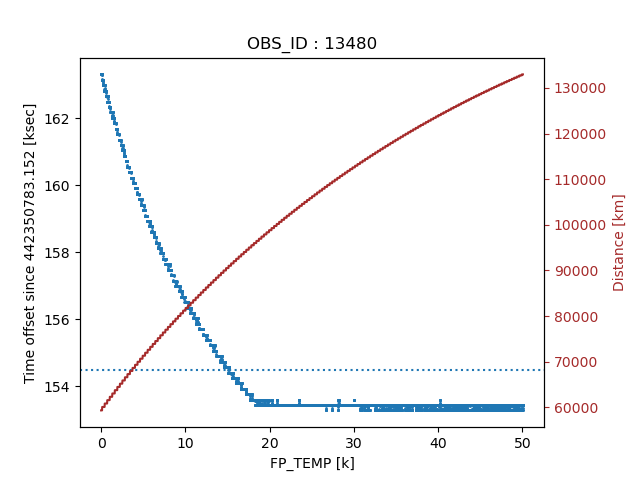

In [5]:
display < fptemp.png

## Choose GTIs


In [6]:
pset dmgti infile=acisf13480_000N003_mtl1.fits.gz
pset dmgti outfile=fp_temp.gti
pset dmgti userlimit="fp_temp<154.5"
pset dmgti mode=h clob+
dmgti

In [7]:
dmlist fp_temp.gti blocks,subspace

 
--------------------------------------------------------------------------------
Dataset: fp_temp.gti
--------------------------------------------------------------------------------
 
     Block Name                          Type         Dimensions
--------------------------------------------------------------------------------
Block    1: PRIMARY                        Null        
Block    2: FILTER                         Table         1 cols x 0        rows
Block    3: GTI                            Table         2 cols x 4        rows
 
--------------------------------------------------------------------------------
Data subspace for block FILTER: Components: 1 Descriptors: 1 
--------------------------------------------------------------------------------
 
 --- Component 1 --- 
   1 TIME                 Real8               TABLE GTI
                                              
                                              442365829.0019089580:442365847.6019091010
          

## Apply

In [8]:
dmcopy "acisf13480N003_evt2.fits.gz[@fp_temp.gti]" good_events.fits clob+

## Check

In [9]:
dmkeypar acisf13480N003_evt2.fits.gz ONTIME echo+

50052.600384951


In [10]:
dmkeypar good_events.fits ONTIME echo+

34896.700268388


# Cleanup


In [11]:
/bin/rm -rf 13480
/bin/rm -f *.fits.gz
